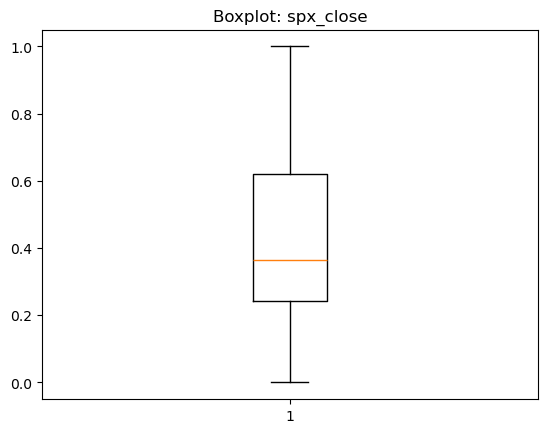

             all  filtered_iqr  winsorized
mean    0.430592      0.430592    0.430048
median  0.363669      0.363669    0.363669
std     0.245414      0.245414    0.235908


In [3]:
import pandas as pd
from pathlib import Path
import sys
import matplotlib.pyplot as plt

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

# Import functions from outliers.py
from src.outliers import detect_outliers_iqr, winsorize_series  

# Load preprocessed dataset 
df = pd.read_csv("../data/processed/preprocessed_dataset.csv")

# Pick a target column for analysis (S&P 500 close)
target_col = "spx_close"

plt.figure()
plt.boxplot(df[target_col])
plt.title(f'Boxplot: {target_col}')
plt.show()

# Detect outliers using IQR 
df['outlier_iqr'] = detect_outliers_iqr(df[target_col])

# Summary statistics
summ_all = df[target_col].describe()[['mean', '50%', 'std']].rename({'50%': 'median'})
summ_filtered = (
    df.loc[~df['outlier_iqr'], target_col]
    .describe()[['mean', '50%', 'std']]
    .rename({'50%': 'median'})
)

# Winsorized version
summ_w = winsorize_series(df[target_col]).describe()[['mean', '50%', 'std']].rename({'50%': 'median'})

# --- Comparison table ---
comp = pd.concat(
    {
        'all': summ_all,
        'filtered_iqr': summ_filtered,
        'winsorized': summ_w,
    },
    axis=1
)

print(comp)